<img src="https://news.mit.edu/sites/default/files/images/201808/julia-programming-language-mit-00.png" alt="drawing" width="600"/>

# Julia 1.8

### Ludwig Böss (USM)

# What is Julia?

A dynamically typed, just-in-time (JIT) compiled programming language.


Focus:
- Fast and easy development
- High Performance Computing (HPC)
- Parallelisation
- Scalability
- Visualisation
- STEM
- Machine Learning

Modern Language features:
- Excellent package system
- Portable environments
- Built-in Documentation and Testing system
- Metaprogramming (code that generates new code)
- Very good interplay with git

## Why should I care?

One possible solution to the Two-Language Problem

### "Typical" C/C++, Fortran workflow:

- Delevopment (Language 1)
    - Optimal performance (almost) out of the box
    - Can be slow progress
    - Tedious for small tasks
- Analysis (Language 2)
    - Post-processing of results
    - Plotting
    - etc.

### "Typical" Python workflow: 

- Development (Language 1)
    - Quick and easy!
    - Pure Python (VERY slow)
    - Numpy/Pandas (aka. C/C++ backend)
- Performance improvement (Language 2)
    - Replace performance-relevant code with C/C++, Fortran
    - (alternative: Add Numba decorators)

### "Typical" Julia workflow:

- Development (Language 1)
    - Quick and easy!
    - Pure Julia (already quite fast)
- Performance improvement (Language 1)
    - remove safety-nets (quick)
    - make parallel (quick)
- Analysis (Language 1)
    - Post-processing
    - Plotting
    - etc.

### "Typical" IDL workflow:

- Pay thousands of euros to morally questionable defence contractors
- Cry about your life choices

# Syntax

## IO

In [8]:
print("Hello, World!\n")    # optional line-break
println("Hello, World!")    # line-break included

x = 1.0
println("x = $x")           # use (unformatted) variable in string

Hello, World!
Hello, World!
x = 1.0


In [9]:
# formatted output
using Printf     # import package

i = 3
@sprintf("%03i", i)   # macro

"003"

## Variables

In [10]:
# optionally typed -> default is 64-bit!
x = 1.0
y = 2
z = true

println(typeof(x))
println(typeof(y))
println(typeof(z))

Float64
Int64
Bool


In [11]:
k = x + y
println("k = $k ($(typeof(k)))")

k = 3.0 (Float64)


In [12]:
# dynamically typed -> variables can change type
x = true
println(typeof(x))

Bool


In [13]:
# force type in declaration
x = 1.0f0
y = Float32(1.0)    # parse to function
z = 1.0 |> Float32  # pipe to function

println(typeof(x))
println(typeof(y))
println(typeof(z))

Float32
Float32
Float32


In [14]:
# force type in function
function declare_f32(x)
    y::Float32 = x
    return y
end
x = declare_f32(1.0)
println(typeof(x))

Float32


In [ ]:
# variable types in function arguments are optional
function declare_f64_to_f32(x::Float64)
    y::Float32 = x
    return y
end
x = declare_f64_to_f32(1.0)
println(typeof(x))

## Utf-8 support

In [15]:
# utf support with LaTeX syntax
# constants
println("2π = $(2π)")  

2π = 6.283185307179586


In [16]:
# variable
ξ = 1.0
Δ = 4π * ξ
println(Δ)

12.566370614359172


In [17]:
# emoticons -> the cake is a lie
🥧 = false
println(🥧)

false


## Loops

In [19]:
# standard for loop
for i = 1:10
    println("i = $i")   # indentation not relevant!
end                     # end is used instead

i = 1
i = 2
i = 3
i = 4
i = 5
i = 6
i = 7
i = 8
i = 9
i = 10


In [21]:
# loop over entries
values = [1, 4, 6, 8]
for val ∈ values  # equivalent to 'for val in values'
    println("val = $val")
end

val = 1
val = 4
val = 6
val = 8


In [22]:
# nested loops can be written in one line
for i = 1:2, j = 1:3
    println("i = $i, j = $j")
end

i = 1, j = 1
i = 1, j = 2
i = 1, j = 3
i = 2, j = 1
i = 2, j = 2
i = 2, j = 3


## If statements

### Logic statements can be bracketing

In [24]:
x = 2.0

if 1.0 <= x <= 3.0
    println("x is in range!")
else
    println("x is not in range!")
end


x is in range!


## Arrays

### Trigger warning: Julia is 1-indexed

In [25]:
# Vectors
a = [1.0, 2.0, 3.0]            # "by hand"
b = zeros(3)                   # bulk definition
c = ones(3)

println(c[1])

# define datatype
d = Vector{Float64}(undef, 3)  # pure memory allocation (faster!)
e = Array{Float64,1}(undef, 3) # 1D Array is equivalent to Vector

1.0


3-element Vector{Float64}:
 8.1406137e-316
 1.5953263816e-314
 1.0e-323

## Matrices

### Trigger warning: Julia is column major order, like Fortran!

In [27]:
A = [ 1.0 2.0 3.0
      4.0 5.0 6.0 
      7.0 8.0 9.0 ]                # "by hand"

B = zeros(3,3)                     # in bulk
C = ones(3,3)

D = Matrix{Float64}(undef, 3, 3)   # pure memory allocation (faster!)
E = Array{Float64,2}(undef, 3, 3)  # 2D Array is equivalent to Matrix

3×3 Matrix{Float64}:
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0

In [30]:
# assign element wise
B .= 2.0
@. B = 2.0
B[:,1] .= 1.0

println(B)

[1.0 2.0 2.0; 1.0 2.0 2.0; 1.0 2.0 2.0]


In [31]:
# transposed multiplication
A' .* B

3×3 Matrix{Float64}:
 1.0   8.0  14.0
 2.0  10.0  16.0
 3.0  12.0  18.0

## Functions

In [33]:
# inline functions
f(a, b) = a + b

# standard function
function g(a, b)
    a + b   # return optional!
end 

g (generic function with 1 method)

In [34]:
g(1.0, 2.0)

3.0

## Functions

In [40]:
# standard function
g(a, b) = a + b

# optionally typed! -> "multiple dispatch"
g(a::Complex, b::Complex) = println("I'm adding complex numbers! \n$(a + b)")

g (generic function with 3 methods)

In [38]:
# define complex numbers
c1 = 1.0
c2 = 2.0 + 1.0im

# call function for complex numbers
g(c1, c2)

3.0 + 1.0im

In [41]:
# call function for all other numbers
g(1, 2)

3

## Functions

In [42]:
# definition for only a specific datatype
h(a::Int64, b::Int64) = a + b

h (generic function with 1 method)

In [43]:
# this works
h(1, 2)

3

In [46]:
# this doesn't work
h(1.0, 2.0)

LoadError: MethodError: no method matching h(::Float64, ::Float64)

## Functions

In [47]:
# check for type stability
@code_warntype f(1.0, 2.0)

MethodInstance for f(::Float64, ::Float64)
  from f(a, b) in Main at In[33]:2
Arguments
  #self#::Core.Const(f)
  a::Float64
  b::Float64
Body::Float64
1 ─ %1 = (a + b)::Float64
└──      return %1



## Functions

In [48]:
# look at assembler code
@code_native f(1.0, 2.0)

	.text
	.file	"f"
	.globl	julia_f_5319                    # -- Begin function julia_f_5319
	.p2align	4, 0x90
	.type	julia_f_5319,@function
julia_f_5319:                           # @julia_f_5319
; ┌ @ In[33]:2 within `f`
	.cfi_startproc
# %bb.0:                                # %top
	pushq	%rbp
	.cfi_def_cfa_offset 16
	.cfi_offset %rbp, -16
	movq	%rsp, %rbp
	.cfi_def_cfa_register %rbp
; │┌ @ float.jl:383 within `+`
	vaddsd	%xmm1, %xmm0, %xmm0
; │└
	popq	%rbp
	retq
.Lfunc_end0:
	.size	julia_f_5319, .Lfunc_end0-julia_f_5319
	.cfi_endproc
; └
                                        # -- End function
	.section	".note.GNU-stack","",@progbits


## Functions

In [49]:
# also utf support
Σ(x) = sum(x)    # "function overload"

data = [1.0, 2.0, 3.0]
Σ(data)

6.0

# Ecosystem

## Shell

In REPL type " ; "

In code use:

In [50]:
cd(@__DIR__)    # change to directory of current file
pwd()

"C:\\Users\\ludwi\\Documents\\Code\\CodeCoffee\\IntroToJulia"

## Package Manager

In REPL type " ] "

In code use:

```julia
using Pkg
Pkg.add("CairoMakie")
```

## Environments

In [51]:
using Pkg
Pkg.activate(".")  # activate environment in current folder
# Pkg.instantiate()  # installs all packages for you that I used in the talk

  Activating project at `C:\Users\ludwi\Documents\Code\CodeCoffee\IntroToJulia`


In [52]:
Pkg.status()

Status `C:\Users\ludwi\Documents\Code\CodeCoffee\IntroToJulia\Project.toml`
  [6e4b80f9] BenchmarkTools v1.3.1
⌃ [13f3f980] CairoMakie v0.8.13
⌃ [bdcacae8] LoopVectorization v0.12.133
  [438e738f] PyCall v1.94.1
  [54ab9b88] SPHKernels v2.0.1
Info Packages marked with ⌃ have new versions available and may be upgradable.


In [53]:
Pkg.add("GadgetIO")

   Resolving package versions...
    Updating `C:\Users\ludwi\Documents\Code\CodeCoffee\IntroToJulia\Project.toml`
  [826b50da] + GadgetIO v0.6.3
    Updating `C:\Users\ludwi\Documents\Code\CodeCoffee\IntroToJulia\Manifest.toml`
  [826b50da] + GadgetIO v0.6.3
  [8bb1440f] + DelimitedFiles


In [54]:
Pkg.status()

Status `C:\Users\ludwi\Documents\Code\CodeCoffee\IntroToJulia\Project.toml`
  [6e4b80f9] BenchmarkTools v1.3.1
⌃ [13f3f980] CairoMakie v0.8.13
  [826b50da] GadgetIO v0.6.3
⌃ [bdcacae8] LoopVectorization v0.12.133
  [438e738f] PyCall v1.94.1
  [54ab9b88] SPHKernels v2.0.1
Info Packages marked with ⌃ have new versions available and may be upgradable.


## This creates 2 files:

### Project.toml

```julia
[deps]
GadgetIO = "826b50da-1eb7-48f3-bd4b-d2350582c309"
```

### Manifest.toml

```julia

julia_version = "1.8.2"
manifest_format = "2.0"

[...]

[[deps.GadgetIO]]
deps = ["Dates", "DelimitedFiles", "Documenter", "DocumenterTools", "Downloads", "LinearAlgebra", "Printf", "ProgressMeter", "Test"]
git-tree-sha1 = "2bdce0369aecda24f6da5af11e67873cd93355f1"
uuid = "826b50da-1eb7-48f3-bd4b-d2350582c309"
version = "0.5.8"

[...]

[[deps.ProgressMeter]]
deps = ["Distributed", "Printf"]
git-tree-sha1 = "afadeba63d90ff223a6a48d2009434ecee2ec9e8"
uuid = "92933f4c-e287-5a05-a399-4b506db050ca"
version = "1.7.1"

[[deps.REPL]]
deps = ["InteractiveUtils", "Markdown", "Sockets", "Unicode"]
uuid = "3fa0cd96-eef1-5676-8a61-b3b8758bbffb"

[[deps.SHA]]
uuid = "ea8e919c-243c-51af-8825-aaa63cd721ce"

[[deps.Test]]
deps = ["InteractiveUtils", "Logging", "Random", "Serialization"]
uuid = "8dfed614-e22c-5e08-85e1-65c5234f0b40"

[...]

```

## Portability:

You can send the entire folder to someone and just add the lines

```julia
using Pkg
Pkg.activate(".")
Pkg.instantiate()
```
to the top of your `.jl` file. 

This will automatically install all required packages, down to the last commit.

### Cleanup

In [55]:
Pkg.rm("GadgetIO")

    Updating `C:\Users\ludwi\Documents\Code\CodeCoffee\IntroToJulia\Project.toml`
  [826b50da] - GadgetIO v0.6.3
    Updating `C:\Users\ludwi\Documents\Code\CodeCoffee\IntroToJulia\Manifest.toml`
  [826b50da] - GadgetIO v0.6.3
  [8bb1440f] - DelimitedFiles


In [56]:
Pkg.status()

Status `C:\Users\ludwi\Documents\Code\CodeCoffee\IntroToJulia\Project.toml`
  [6e4b80f9] BenchmarkTools v1.3.1
⌃ [13f3f980] CairoMakie v0.8.13
⌃ [bdcacae8] LoopVectorization v0.12.133
  [438e738f] PyCall v1.94.1
  [54ab9b88] SPHKernels v2.0.1
Info Packages marked with ⌃ have new versions available and may be upgradable.


```julia
# return to default environment
Pkg.activate()   # without function arguments
Pkg.status()
```

# What I like

## (just-in-time) Compiled Language -> Performance

### (Estimate pi example)

In [57]:
using SPHKernels

function add_loop(N::Int64)
    
    # define kernel function
    k = WendlandC6()
    # define position array
    x = [0.1, 0.0, 0.0]
    # store value
    count = 0.0

    # run loop
    for i = 1:N
        # shift x-position
        x[1] += 1.e-3 * x[1]
        # calculate distance
        r = √( x[1]^2 + x[2]^2 + x[3]^2 )
        # add kernel value at distance r
        count += 𝒲(k, r, 1.0)
    end
    count
end

N = 1_000_000

# usually: 1st function call slow (includes compile time)
@time add_loop(N)
# 2nd function call fast
@time add_loop(N)

  0.002198 seconds (1 allocation: 80 bytes)
  0.002048 seconds (1 allocation: 80 bytes)


5902.593566111972

## Development -> Production

In [58]:
# useful tool for performance improvements
using BenchmarkTools

In [60]:
# Naive default
function simple_add!(a)
    for i = 1:length(a)
        a[i] += 1.0
    end
end

simple_add! (generic function with 1 method)

In [61]:
# 255 -> does not fill an AVX512 register completely, so it will not vectorize by default
a = zeros(255)
# performance testing macro
# runs the function N times and computes the mean execution time
@btime simple_add!($a)

  22.189 ns (0 allocations: 0 bytes)


In [62]:
function inbounds_add!(a)
    # switch of bounds check -> segmentation fault instead of error message if i > length(a)
    @inbounds for i = 1:length(a)
        a[i] += 1.0
    end
end

inbounds_add! (generic function with 1 method)

In [63]:
a = zeros(255)
@btime inbounds_add!($a)

  21.787 ns (0 allocations: 0 bytes)


In [64]:
using LoopVectorization

function avx_add!(a)
    # enforce vectorization 
    @turbo for i = eachindex(a)
        a[i] += 1.0
    end
end

avx_add! (generic function with 1 method)

In [66]:
a = zeros(255)
@btime avx_add!($a)

  15.130 ns (0 allocations: 0 bytes)


In [67]:
a = zeros(256)
@btime avx_add!($a)

  9.710 ns (0 allocations: 0 bytes)


## Parallelisation

### Shared Memory

In [69]:
using Base.Threads   # import threading library
println(nthreads())  # number of allocated threads

function threaded_add!(a)
    # add macro in front of loop
    @threads for i = 1:length(a)
        a[i] += 1.0
    end
end

16


threaded_add! (generic function with 1 method)

In [70]:
a = zeros(255)
# this will be slow, as is doesn't make sense to distribute such a small array over threads
@btime threaded_add!($a)

  7.200 μs (96 allocations: 10.39 KiB)


### Distributed Memory

#### CC-NUMA

```julia
""" Native Julia parallelisation """
using Distributed
# allocate cores
addprocs(32)
```


#### Cluster

```julia
""" Julia implementation with SLURM / PBS / etc. """
using Distributed, ClusterManagers
addprocs_slurm(512)
```


```julia

""" MPI """
# MPI wrapper: https://github.com/JuliaParallel/MPI.jl
using MPI

MPI.Init()

comm = MPI.COMM_WORLD
print("Hello world, I am rank $(MPI.Comm_rank(comm)) of $(MPI.Comm_size(comm))\n")
MPI.Barrier(comm)
```


```julia

""" Alternative native Julia implementation """
# in + out of core parallelisation
using Distributed; addprocs(8) # get us some workers
using Dagger                   # https://github.com/JuliaParallel/Dagger.jl

# do some stuff in parallel!
a = Dagger.@spawn 1+3
b = Dagger.@spawn rand(a, 4)
c = Dagger.@spawn sum(b)
fetch(c) # some number!
```

## Relationship to Python

### aka: "I have all this uncommented Python Code from 2009, I can't just throw that away!"

## PyCall

In [71]:
using PyCall
# import any package by name
np = pyimport("numpy")

PyObject <module 'numpy' from 'C:\\Users\\ludwi\\.julia\\conda\\3\\lib\\site-packages\\numpy\\__init__.py'>

In [72]:
# numpy       julia
np.sqrt(2) == √(2)

true

### PyPlot

In [73]:
using PyPlot   # matplotlib wrapper for Julia

# rcParams
rc("font", family = "stixgeneral")
rc("mathtext", fontset = "stix")

fig = figure()

subplot(1,1,1)
    # get the current axis
    ax = gca()

    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([1.e-4, 1.0])
    ax.set_yscale("log")

    xlabel("x")
    # L"" defines a LaTeX string
    ylabel(L"\Sigma_\odot", fontsize=15)

    scatter(rand(10), rand(10), label="example")

    legend(frameon=false, loc="lower right")

fig


LoadError: ArgumentError: Package PyPlot not found in current path.
- Run `import Pkg; Pkg.add("PyPlot")` to install the PyPlot package.

## Astro-Libraries

[JuliaAstro](https://github.com/orgs/JuliaAstro/repositories)

Packages for Cosmology, Transits, WCS, CCD reduction, ...

# What I dislike

## Startup time due to JIT compile

In [74]:
@time using CairoMakie

┌ Info: Precompiling CairoMakie [13f3f980-e62b-5c42-98c6-ff1f3baf88f0]
└ @ Base loading.jl:1664


 90.317022 seconds (53.61 M allocations: 3.234 GiB, 1.69% gc time, 0.52% compilation time: 26% of which was recompilation)


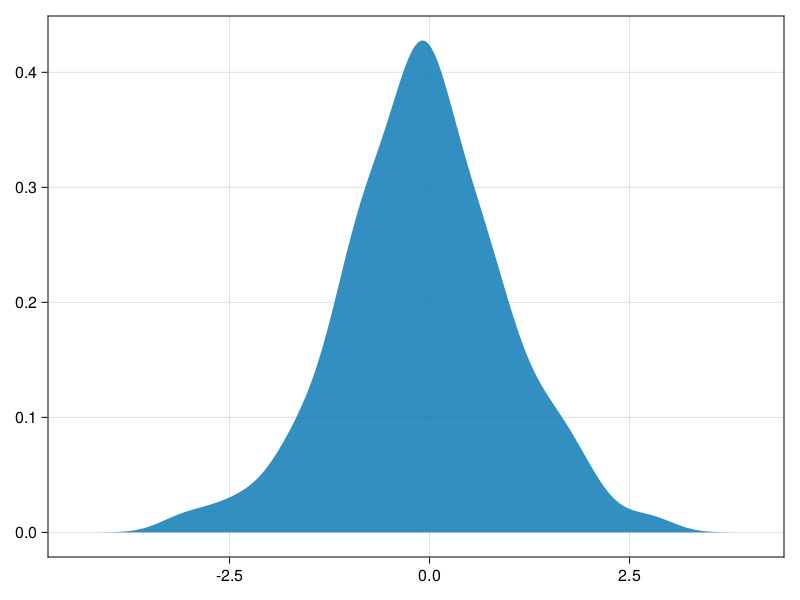

In [75]:
# time to first plot is LONG!
fig = CairoMakie.Figure()
Axis(fig[1, 1])

density!(randn(200))
fig

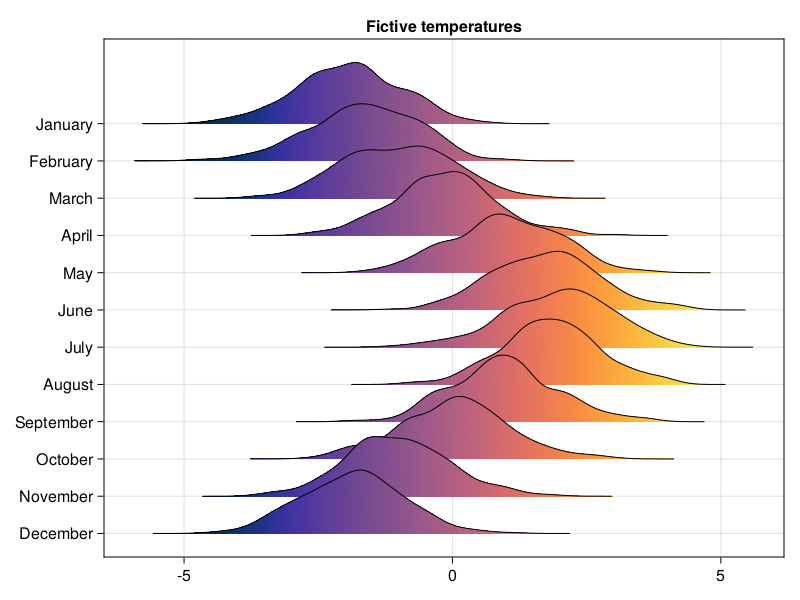

In [76]:
# next plot is significantly faster

months = ["January", "February", "March", "April",
    "May", "June", "July", "August", "September",
    "October", "November", "December"]

fig = CairoMakie.Figure()
Axis(fig[1, 1], title = "Fictive temperatures",
    yticks = ((1:12) ./ 4,  reverse(months)))

for i in 12:-1:1
    d = density!(randn(250) .- 2sin((i+3)/6*pi), offset = i / 4,
        color = :x, colormap = :thermal, colorrange = (-5, 5),
        strokewidth = 1, strokecolor = :black)
    # this helps with layering in GLMakie
    translate!(d, 0, 0, -0.1i)
end
fig

## One Solution:

Dynamically reload code with [Revise](https://timholy.github.io/Revise.jl/stable/).

On the USM systems you need to add `export JULIA_REVISE_POLL=1` to your .bashrc!

# Usage on USM systems

- Installing Julia
    - Download latest release [here](https://julialang.org/downloads/)
    - Unpack .tar file with `tar -xvf <filename>`
    - Add these environment variables to your .bashrc:
        - `export JULIA_REVISE_POLL=1`                           (this checks imported packages based on time, not edits)
        - `export JULIA_NUM_THREADS=<Nthreads>`                  (number of threads Julia is allowed to use)
        - `export JULIA_HOME=~/julia-1.7.1/bin`  (location of the Julia binary)
        - `export PATH=$JULIA_HOME:$PATH`                        (add binary to path)
        
- Soon: juliaup
    - Julia version manager [video](https://www.youtube.com/watch?v=rFlbjWC6zYA)

- Jupyter notebook:
    - Install Julia
    - Add package [IJulia](https://julialang.github.io/IJulia.jl/stable/manual/installation/)
    - Open a notebook and select the julia kernel.
    - Start coding!

- VSCode:
    - Install Julia
    - Add Julia [extension](https://www.julia-vscode.org/)
    - Create a `.jl` file and write some code.
    - Run individual lines with `shift+enter`

- REPL:
    - Install Julia
    - type `julia` in the terminal
    - write code directly on the REPL, or: 
        - dynamically load code from a file with `using Revise; includet("path/to/file.jl")`
        - edit the file in an editor
        - call the functions of the file from the REPL

# Functional Programming

## (OOP is dead, longe live OOP)

### Object-Oriented Programming (OOP)

Define objects that hold specific data and methods that perform specific operations.

In [ ]:
# simple Python example
class Circle:

    # data relevant for class
    center = [0.0, 0.0]
    radius = 0.0
    # ...

    # constructor of class
    def __init__(center=[0.0, 0.0], radius=0.0):
        self.center = center
        self.radius = radius
        # ...

    # methods
    def area(self):
        return np.pi * self.radius**2

    def center_plus5(self):
        return self.center + 5

In [ ]:
# simple Python example
class Square:

    # data relevant for class
    center = [0.0, 0.0]
    side = 0.0
    # ...

    # constructor of class
    def __init__(center=[0.0, 0.0], side=0.0):
        self.center = center
        self.side = side
        # ...

    # methods
    def area(self):
        return self.side**2

    # re-implementation (if no logical inheritance possible)
    def center_plus5(self):
        return self.center + 5

## Functional programming

Define objects that (only!) hold data and functions that (only!) operate on data

### Data types

In [ ]:
# abstract type only for "inheritance"
# -> type structure is based on set theory
abstract type AbstractShape end

In [ ]:
# Circle as a subtype of AbstractShape
# struct -> all data constant!
struct Circle{T} <: AbstractShape
    center::Vector{T}
    radius::T
end

In [ ]:
# initialize Circle with values ("constructor" implicit)
circle = Circle([0.5, 1.0], 1.0)

In [ ]:
# Square as a subtype of AbstractShape
struct Square{T} <: AbstractShape
    center::Vector{T}
    side::T
end
 
# "constructor" of datatype, only required for special initialisation
function Square(center::Vector{T} = [0.0, 0.0],
                side::T = 1.0) where T
    
    return Square{T}(center, side)
end

In [ ]:
# initialize Circle with custom default behaviour
square = Square()
square.side

In [ ]:
# no default constructor!
circle_default = Circle()

In [ ]:
# structs that can be modified
mutable struct MutableSquare{T} <: AbstractShape
    center::Vector{T}
    side::T
end

In [ ]:
# immutable square -> fields can't be edited
i_square = Square()
i_square.side = 2.0

In [ ]:
# mutable square -> fields can be edited
m_square = MutableSquare([0.0, 0.0], 1.0)
m_square.side = 2.0
m_square.side

## Functions

### Multiple Dispatch

In [ ]:
# For Circle
function area(circle::Circle)
    π*circle.radius^2
end
area(circle)

In [ ]:
# for square
function area(square::Square)
    square.side^2
end
area(square)

In [ ]:
# for both
function center_plus5(shape::AbstractShape)
    # element-wise operation (helper macro)
    @. shape.center + 5.0
end

println("circle: ", center_plus5(circle))
println("square: ", center_plus5(square))

```julia
struct Square{T} <: AbstractShape
    center::Vector{T}
    side::T
end
```

In [ ]:
# datatype T is arbitrary!
# Example with units:
using Unitful
units_square = Square([0.0u"cm", 0.0u"cm"], 2.0u"cm")

println(units_square.side)

A = area(units_square)
println(A)

using UnitfulAstro      # for astronomy units
A_kpc = A |> u"kpc^2"   # convert to kpc^2
println(A_kpc)

In [ ]:
#using Pkg
Pkg.add("PyCall")

In [ ]:
Pkg.status()